<a href="https://colab.research.google.com/github/esg99/AIML/blob/main/Copy_of_exchange_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/AED_INR Historical Data.csv")

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/03/2025,23.27,23.24,23.27,23.24,NaN,0.13%
1,06/02/2025,23.24,23.29,23.31,23.22,NaN,-0.19%
2,06/01/2025,23.28,23.28,23.28,23.28,NaN,0.00%
3,05/30/2025,23.28,23.26,23.32,23.21,NaN,0.09%
4,05/29/2025,23.26,23.25,23.31,23.25,NaN,0.04%


In [ ]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1154 non-null   object 
 1   Price     1154 non-null   float64
 2   Open      1154 non-null   float64
 3   High      1154 non-null   float64
 4   Low       1154 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  1154 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.2+ KB


In [ ]:
import pandas as pd
from dateutil import parser

# Step 1: Convert all entries to string (in case of mixed types)
df['Date'] = df['Date'].astype(str)

# Step 2: Parse mixed date formats into datetime
df['Date'] = df['Date'].apply(lambda x: parser.parse(x, dayfirst=False))

# Step 3: Convert all to uniform format with "-" delimiter (ISO format: YYYY-MM-DD)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


In [ ]:
df['Date'].head(20)

In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [ ]:
# Clean numeric columns
for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Clean 'Change %' column (remove % and convert to float)
df['Change %'] = df['Change %'].str.replace('%', '', regex=False)
df['Change %'] = pd.to_numeric(df['Change %'], errors='coerce')

In [ ]:
# Sort by date (ascending order)
df = df.sort_values('Date').reset_index(drop=True)

In [ ]:
df = df.drop(columns=['Vol.'] + [col for col in df.columns if 'Unnamed' in col])


In [ ]:
from dateutil import parser

# Convert to datetime and standardize format without dropping rows
df['Date'] = df['Date'].astype(str).apply(lambda x: parser.parse(x, dayfirst=False))
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')  # Uniform ISO format


In [ ]:
df['Date'] = df['Date'].astype(str).apply(lambda x: parser.parse(x, dayfirst=False))
# DO NOT use strftime here if you want Date to remain datetime


In [ ]:
df = df.sort_values('Date').reset_index(drop=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1154 non-null   datetime64[ns]
 1   Price     1154 non-null   float64       
 2   Open      1154 non-null   float64       
 3   High      1154 non-null   float64       
 4   Low       1154 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  1154 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 63.2+ KB


In [ ]:
df.to_csv('AED_INR_Enhanced_Analysis.csv', index=False)

from google.colab import files
files.download('AED_INR_Enhanced_Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Optional: Drop 'Vol.' if you're not using it
df = df.drop(columns=['Vol.'])


ADDING ROLLING INDICATORS (TREND DETECTION)

In [ ]:
# 7-day and 30-day moving average
df['MA_7'] = df['Price'].rolling(window=7).mean()
df['MA_30'] = df['Price'].rolling(window=30).mean()

# 30-day rolling standard deviation (volatility)
df['Volatility_30'] = df['Price'].rolling(window=30).std()


In [ ]:
df['Good_to_Convert'] = df['Price'] > (df['MA_30'] + df['Volatility_30'])


In [ ]:
df['Bad_to_Convert'] = df['Price'] < (df['MA_30'] - df['Volatility_30'])


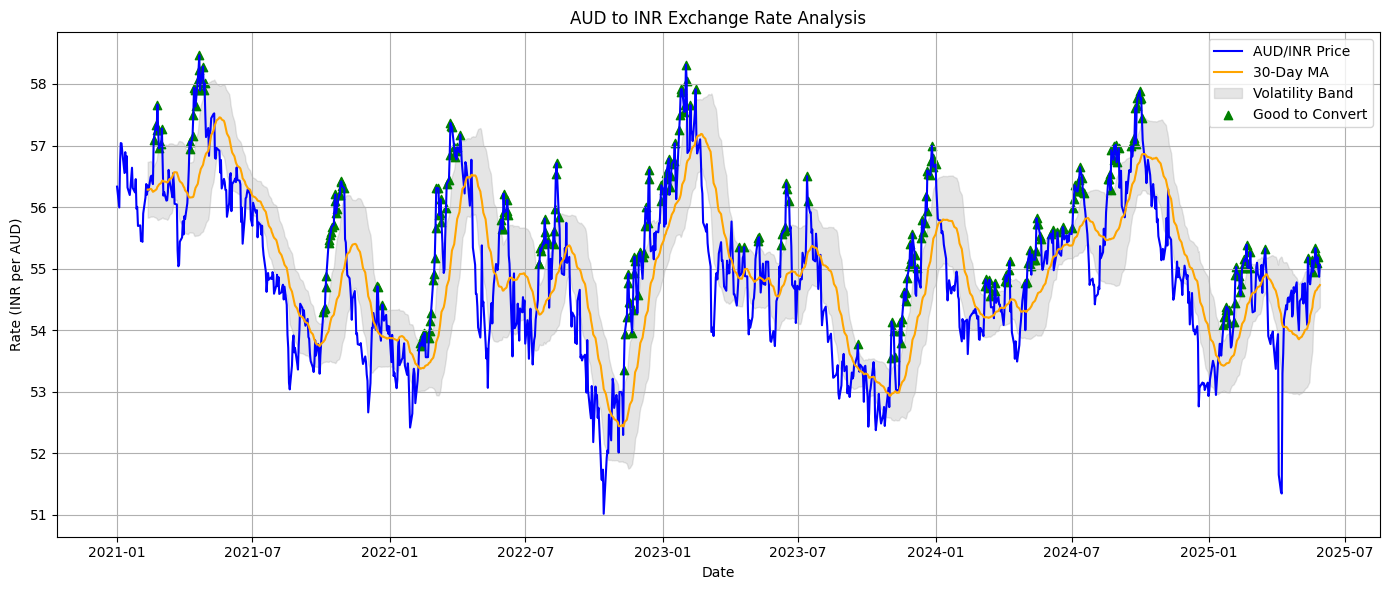

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price'], label='AUD/INR Price', color='blue')
plt.plot(df['Date'], df['MA_30'], label='30-Day MA', color='orange')
plt.fill_between(df['Date'],
                 df['MA_30'] + df['Volatility_30'],
                 df['MA_30'] - df['Volatility_30'],
                 color='gray', alpha=0.2, label='Volatility Band')

plt.scatter(df[df['Good_to_Convert']]['Date'],
            df[df['Good_to_Convert']]['Price'],
            color='green', label='Good to Convert', marker='^')

plt.legend()
plt.title('AUD to INR Exchange Rate Analysis')
plt.xlabel('Date')
plt.ylabel('Rate (INR per AUD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('AUD_INR_Analysis_Enhanced.csv', index=False)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)


In [ ]:
# Daily % change
df['Daily_Change_%'] = df['Price'].pct_change() * 100

# 7-day % change (trend insight)
df['7D_Change_%'] = df['Price'].pct_change(periods=7) * 100


In [ ]:
# Daily range (High - Low)
df['Range'] = df['High'] - df['Low']

# Daily range % of price
df['Range_%'] = (df['Range'] / df['Price']) * 100


In [ ]:
# Add Month and Quarter columns
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')

# Monthly average price
monthly_avg = df.groupby('Month')['Price'].mean().reset_index(name='Monthly_Avg_Price')

# Quarterly average price
quarterly_avg = df.groupby('Quarter')['Price'].mean().reset_index(name='Quarterly_Avg_Price')


In [ ]:
df.to_csv('AUD_INR_Enhanced_Analysis.csv', index=False)
monthly_avg.to_csv('AUD_Monthly_Avg.csv', index=False)
quarterly_avg.to_csv('AUD_Quarterly_Avg.csv', index=False)
#combined_df.to_csv('AUD_vs_USD.csv', index=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('AUD_INR_Enhanced_Analysis.csv')
files.download('AUD_Monthly_Avg.csv')
files.download('AUD_Quarterly_Avg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

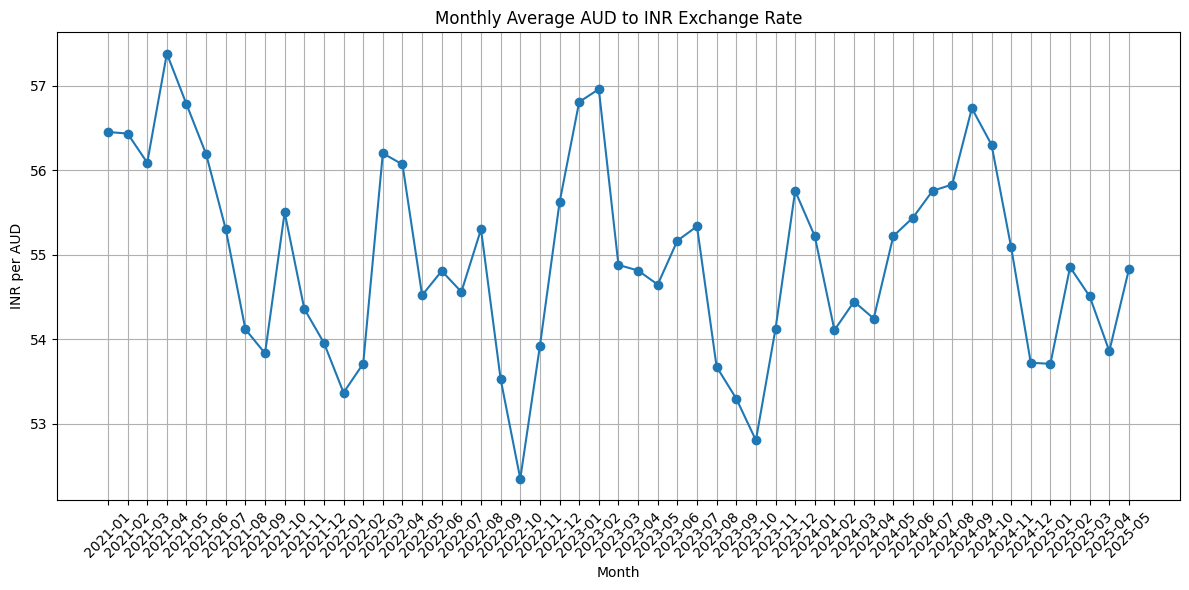

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_avg['Month'].astype(str), monthly_avg['Monthly_Avg_Price'], marker='o')
plt.title('Monthly Average AUD to INR Exchange Rate')
plt.xlabel('Month')
plt.ylabel('INR per AUD')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.download('AUD_INR_Enhanced_Analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title
'''import pandas as pd
from dateutil import parser

# Custom function to parse mixed-format date strings
def parse_mixed_date(date_str):
    try:
        return parser.parse(date_str, dayfirst=False)  # assume mm/dd/yyyy or mm-dd-yyyy
    except:
        return pd.NaT

# Apply only to non-null values
df['Date'] = df['Date'].astype(str).apply(parse_mixed_date)

In [ ]:
# @title
'''# Drop rows where parsing failed (truly invalid)
df = df.dropna(subset=['Date'])

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

In [ ]:
# @title
'''import pandas as pd

def load_and_clean_currency_data(filepath, currency_name):
    df = pd.read_csv(filepath)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df = df.dropna(subset=['Date'])  # remove bad dates
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
    df['Currency'] = currency_name
    df = df.sort_values('Date')
    return df

aed_df = load_and_clean_currency_data('AED_INR Historical Data.csv', 'AED')

In [ ]:
import pandas as pd
import os


In [ ]:
# Map currency codes to file names
currency_files = {
    'AUD': 'AUD_INR_Enhanced_Analysis.csv',
    'USD': 'USD_INR_Enhanced_Analysis.csv',
    'EUR': 'EUR_INR_Enhanced_Analysis.csv',
    'GBP': 'GBP_INR_Enhanced_Analysis.csv',
    'AED': 'AED_INR Historical Data.csv',
}

master_df = pd.DataFrame()

for currency, filename in currency_files.items():
    df = pd.read_csv(filename)

    # Standardize and clean
    df = df[['Date', 'Price', 'Open', 'High', 'Low', 'Change %']]
    df['Currency'] = currency

    # Convert date formats
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)
    df.dropna(subset=['Date'], inplace=True)

    # Clean 'Change %'
    df['Change %'] = df['Change %'].astype(str).str.replace('%', '', regex=False).astype(float)

    # Append to master
    master_df = pd.concat([master_df, df], ignore_index=True)


/tmp/ipython-input-2-4036335313.py:20: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)
/tmp/ipython-input-2-4036335313.py:20: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)
/tmp/ipython-input-2-4036335313.py:20: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)
/tmp/ipython-input-2-4036335313.py:20: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format 

In [ ]:
# Reorder columns for clarity
master_df = master_df[['Date', 'Currency', 'Price', 'Open', 'High', 'Low', 'Change %']]

# Sort by Date then Currency
master_df.sort_values(by=['Date', 'Currency'], inplace=True)

# Export to CSV
master_df.to_csv("Master_Exchange_Rate_Data.csv", index=False)


In [ ]:
from google.colab import files
files.download('Master_Exchange_Rate_Data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
currency_files = {
    'AUD': '/content/AUD_INR Historical Data.csv',
    'USD': '/content/USD_INR Historical Data.csv',
    'GBP': '/content/GBP_INR Historical Data.csv',
    'EUR': '/content/EUR_INR Historical Data.csv',
    'AED': '/content/AED_INR Historical Data.csv'
}


In [ ]:
import pandas as pd

def clean_and_process(file_path, currency):
    # Load
    df = pd.read_csv(file_path)

    # Fix inconsistent date formats
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
    df['Date'] = df['Date'].fillna(pd.to_datetime(df['Date'], format='%m-%d-%Y', errors='coerce'))
    df = df.dropna(subset=['Date'])

    # Sort by date
    df = df.sort_values('Date').reset_index(drop=True)

    # Feature engineering
    df['Daily_Change_%'] = df['Price'].pct_change() * 100
    df['7D_Change_%'] = df['Price'].pct_change(periods=7) * 100
    df['Range'] = df['High'] - df['Low']
    df['Range_%'] = (df['Range'] / df['Price']) * 100
    df['Month'] = df['Date'].dt.to_period('M')
    df['Quarter'] = df['Date'].dt.to_period('Q')

    # Save full enhanced file
    df.to_csv(f'{currency}_INR_Enhanced_Analysis.csv', index=False)

    # Save monthly & quarterly summaries
    df.groupby('Month')['Price'].mean().reset_index(name='Monthly_Avg_Price')\
      .to_csv(f'{currency}_Monthly_Avg.csv', index=False)
    df.groupby('Quarter')['Price'].mean().reset_index(name='Quarterly_Avg_Price')\
      .to_csv(f'{currency}_Quarterly_Avg.csv', index=False)

    return df


In [ ]:
all_currency_data = {}

for currency, path in currency_files.items():
    print(f'Processing {currency}...')
    df = clean_and_process(path, currency)
    all_currency_data[currency] = df


Processing AUD...
Processing USD...
Processing GBP...
Processing EUR...
Processing AED...


In [ ]:
import shutil

# Create a zip archive of all .csv files
shutil.make_archive("Exchange_Rate_Analysis", 'zip', '.', '.')

# Download the zip
files.download("Exchange_Rate_Analysis.zip")


RuntimeError: File size too large, try using force_zip64

In [ ]:
from google.colab import files
files.download('AED_INR_Enhanced_Analysis.csv')
files.download('AED_Monthly_Avg.csv')
files.download('AED_Quarterly_Avg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('EUR_INR_Enhanced_Analysis.csv')
files.download('EUR_Monthly_Avg.csv')
files.download('EUR_Quarterly_Avg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('GBP_INR_Enhanced_Analysis.csv')
files.download('GBP_Monthly_Avg.csv')
files.download('GBP_Quarterly_Avg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('USD_INR_Enhanced_Analysis.csv')
files.download('USD_Monthly_Avg.csv')
files.download('USD_Quarterly_Avg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

currency_files = ['AUD', 'USD', 'GBP', 'EUR', 'AED']
master_df = pd.DataFrame()

for curr in currency_files:
    df = pd.read_csv(f'{curr}_INR_Enhanced_Analysis.csv')
    df['Currency'] = curr  # Add currency label
    master_df = pd.concat([master_df, df])

# Save combined file
master_df.to_csv('All_Currency_Combined.csv', index=False)


In [ ]:
from google.colab import files
files.download('All_Currency_Combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 ## Data Exploration in Python #

# New Section

In [ ]:

# Example with AUD
aud_df = pd.read_csv('AUD_INR_Enhanced_Analysis.csv', parse_dates=['Date'])

# Preview the data
aud_df.head()


,Date,Price,Open,High,Low,Vol.,Change %,Daily_Change_%,7D_Change_%,Range,Range_%,Month,Quarter
0,2021-01-01,56.332,56.215,56.345,56.190,1.64K,0.25%,NaN,NaN,0.155,0.275154,2021-01,2021Q1
1,2021-01-04,55.994,56.325,56.541,55.855,95.41K,-0.60%,-0.600014,NaN,0.686,1.225131,2021-01,2021Q1
2,2021-01-05,56.719,56.023,56.876,55.983,94.19K,1.29%,1.294782,NaN,0.893,1.574428,2021-01,2021Q1
3,2021-01-06,57.040,56.749,57.150,56.597,113.54K,0.57%,0.565948,NaN,0.553,0.969495,2021-01,2021Q1
4,2021-01-07,57.033,57.062,57.190,56.713,95.79K,-0.01%,-0.012272,NaN,0.477,0.836358,2021-01,2021Q1


In [ ]:
# Check Structure & Nulls

In [ ]:
# Shape and structure
aud_df.shape

(1151, 13)

In [ ]:
aud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1151 non-null   datetime64[ns]
 1   Price           1151 non-null   float64       
 2   Open            1151 non-null   float64       
 3   High            1151 non-null   float64       
 4   Low             1151 non-null   float64       
 5   Vol.            539 non-null    object        
 6   Change %        1151 non-null   object        
 7   Daily_Change_%  1150 non-null   float64       
 8   7D_Change_%     1144 non-null   float64       
 9   Range           1151 non-null   float64       
 10  Range_%         1151 non-null   float64       
 11  Month           1151 non-null   object        
 12  Quarter         1151 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 117.0+ KB


In [ ]:
# Check for missing values
aud_df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,612
Change %,0
Daily_Change_%,1
7D_Change_%,7
Range,0


In [ ]:
# Descriptive Statistics

In [ ]:
aud_df.describe()

,Date,Price,Open,High,Low,Daily_Change_%,7D_Change_%,Range,Range_%
count,1151,1151.000000,1151.000000,1151.000000,1151.000000,1150.000000,1144.000000,1151.000000,1151.000000
mean,2023-03-17 19:04:44.622067968,54.949103,54.968187,55.250616,54.693793,-0.000037,-0.005862,0.556823,1.015052
min,2021-01-01 00:00:00,51.018000,50.936000,51.754000,50.724000,-4.234648,-4.824098,0.000000,0.000000
25%,2022-02-08 12:00:00,54.008500,54.025000,54.320500,53.776500,-0.366260,-1.050063,0.394000,0.723182
50%,2023-03-17 00:00:00,54.895000,54.912000,55.173000,54.651000,0.009130,-0.027864,0.504000,0.917154
75%,2024-04-23 12:00:00,55.836000,55.864500,56.172000,55.598000,0.358425,0.955635,0.657500,1.197907
max,2025-05-29 00:00:00,58.466000,58.480000,58.713000,58.105000,3.799638,6.202894,2.813000,5.446062
std,NaN,1.283165,1.285035,1.265682,1.291146,0.624488,1.499945,0.240317,0.446150


In [ ]:
#Plot Daily Price Trends

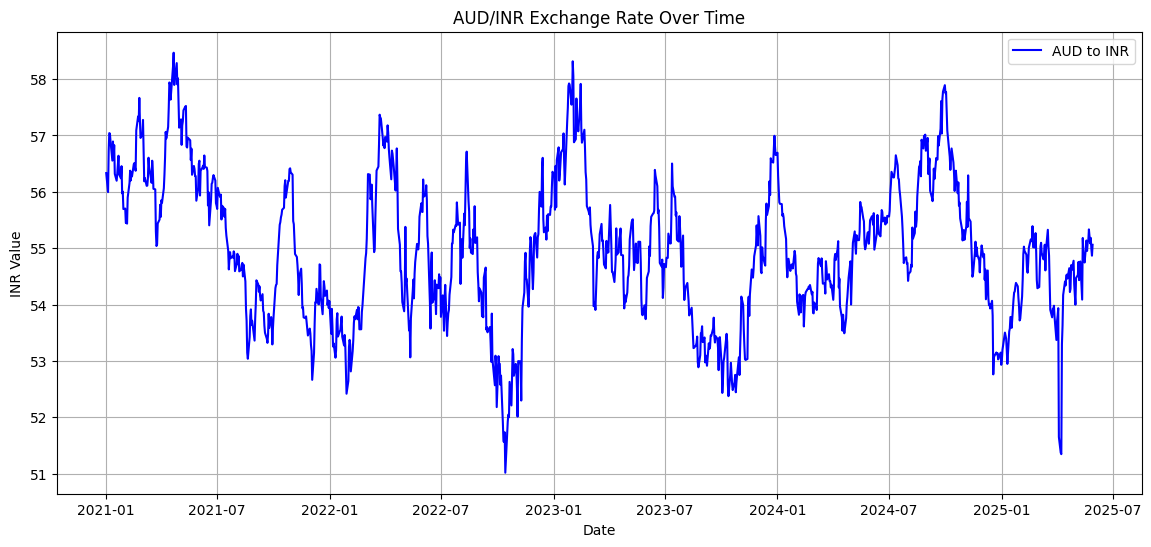

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(aud_df['Date'], aud_df['Price'], label='AUD to INR', color='blue')
plt.title('AUD/INR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('INR Value')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#Visualize Daily Change % and Volatility

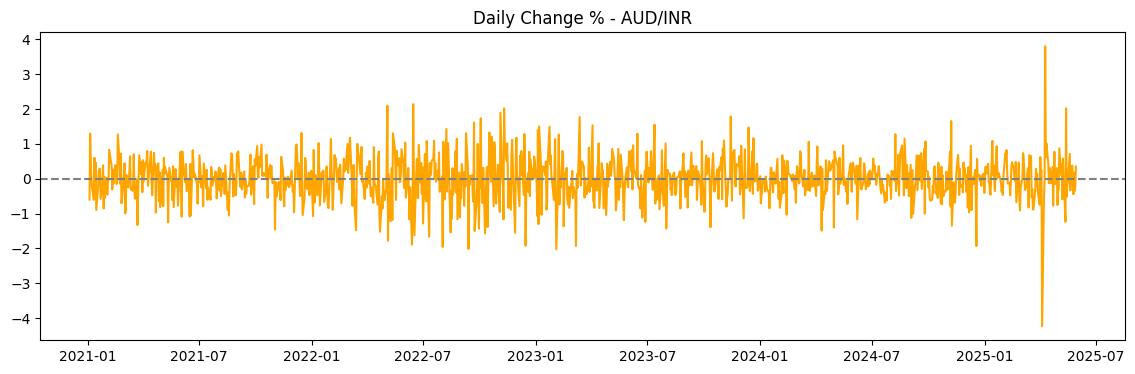

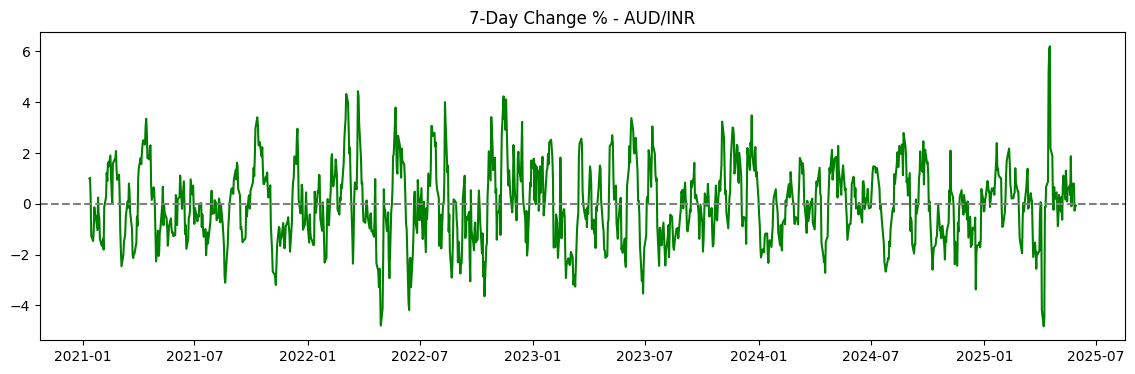

In [ ]:
# Daily Change %
plt.figure(figsize=(14,4))
plt.plot(aud_df['Date'], aud_df['Daily_Change_%'], label='Daily % Change', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Daily Change % - AUD/INR')
plt.show()

# 7-day Rolling Change
plt.figure(figsize=(14,4))
plt.plot(aud_df['Date'], aud_df['7D_Change_%'], label='7D Rolling Change %', color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title('7-Day Change % - AUD/INR')
plt.show()


In [ ]:
#Monthly and Quarterly Trends

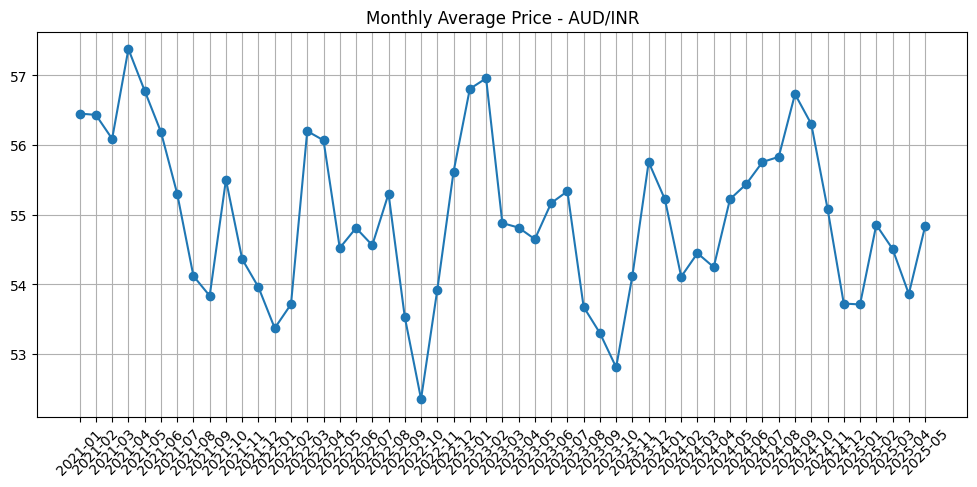

In [ ]:
#Monthly
monthly_df = pd.read_csv('AUD_Monthly_Avg.csv')

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Month'], monthly_df['Monthly_Avg_Price'], marker='o')
plt.title('Monthly Average Price - AUD/INR')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


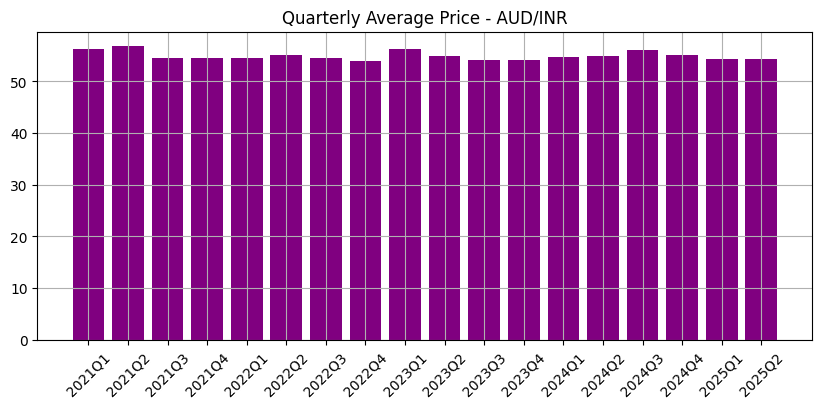

In [ ]:
#Quarterly
quarterly_df = pd.read_csv('AUD_Quarterly_Avg.csv')

plt.figure(figsize=(10,4))
plt.bar(quarterly_df['Quarter'], quarterly_df['Quarterly_Avg_Price'], color='purple')
plt.title('Quarterly Average Price - AUD/INR')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Find Peak and Dip Months

In [ ]:
# Best and worst months
best_month = monthly_df.loc[monthly_df['Monthly_Avg_Price'].idxmax()]
worst_month = monthly_df.loc[monthly_df['Monthly_Avg_Price'].idxmin()]

print("📈 Best Month to Withdraw: ", best_month['Month'], " - INR", best_month['Monthly_Avg_Price'])
print("📉 Worst Month to Withdraw: ", worst_month['Month'], " - INR", worst_month['Monthly_Avg_Price'])


📈 Best Month to Withdraw:  2021-04  - INR 57.37772727272727
📉 Worst Month to Withdraw:  2022-10  - INR 52.35138095238095


In [ ]:
#All Currencies comparison

In [ ]:
currencies = ['AUD', 'USD', 'GBP', 'EUR', 'AED']

for curr in currencies:
    df = pd.read_csv(f'{curr}_INR_Enhanced_Analysis.csv', parse_dates=['Date'])
    print(f"\n--- {curr} ---")
    print(df[['Price', 'Daily_Change_%', '7D_Change_%']].describe())



--- AUD ---
             Price  Daily_Change_%  7D_Change_%
count  1151.000000     1150.000000  1144.000000
mean     54.949103       -0.000037    -0.005862
std       1.283165        0.624488     1.499945
min      51.018000       -4.234648    -4.824098
25%      54.008500       -0.366260    -1.050063
50%      54.895000        0.009130    -0.027864
75%      55.836000        0.358425     0.955635
max      58.466000        3.799638     6.202894

--- USD ---
             Price  Daily_Change_%  7D_Change_%
count  1150.000000     1149.000000  1143.000000
mean     80.286844        0.013861     0.096515
std       4.330321        0.253347     0.660358
min      72.380000       -0.929519    -2.702147
25%      75.442000       -0.099475    -0.221355
50%      82.227000        0.007185     0.074307
75%      83.356500        0.120187     0.436811
max      87.627000        1.638601     2.568645

--- GBP ---
             Price  Daily_Change_%  7D_Change_%
count  1151.000000     1150.000000  1144.000000
m

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Daily & Rolling Changes

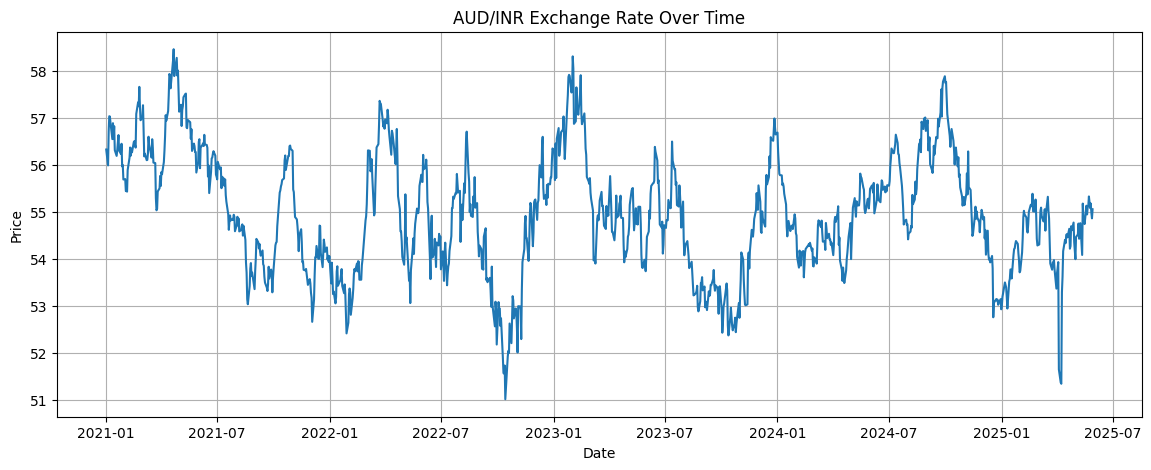

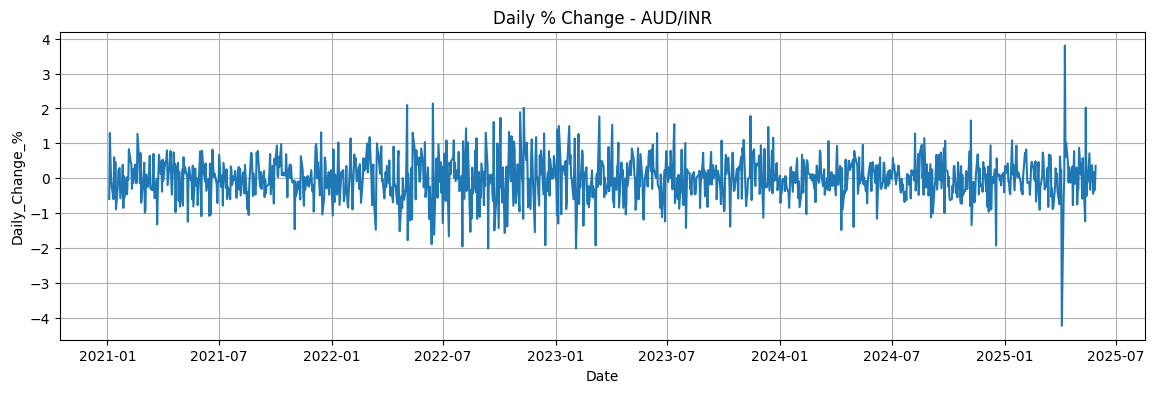

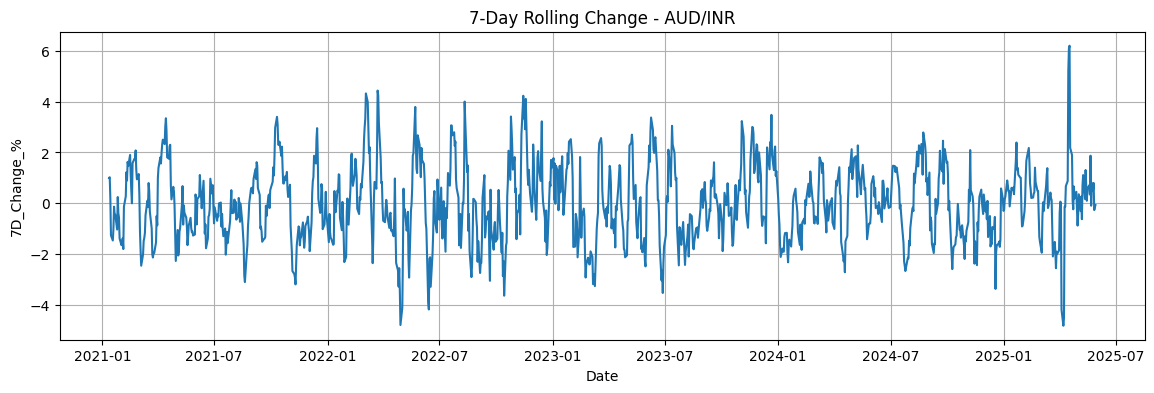

In [ ]:
# Line plot: Daily Price
plt.figure(figsize=(14,5))
sns.lineplot(x='Date', y='Price', data=df)
plt.title("AUD/INR Exchange Rate Over Time")
plt.grid()
plt.show()

# Line plot: Daily % Change
plt.figure(figsize=(14,4))
sns.lineplot(x='Date', y='Daily_Change_%', data=df)
plt.title("Daily % Change - AUD/INR")
plt.grid()
plt.show()

# 7D Rolling % Change
plt.figure(figsize=(14,4))
sns.lineplot(x='Date', y='7D_Change_%', data=df)
plt.title("7-Day Rolling Change - AUD/INR")
plt.grid()
plt.show()


In [ ]:
#Monthly & Quarterly Trends

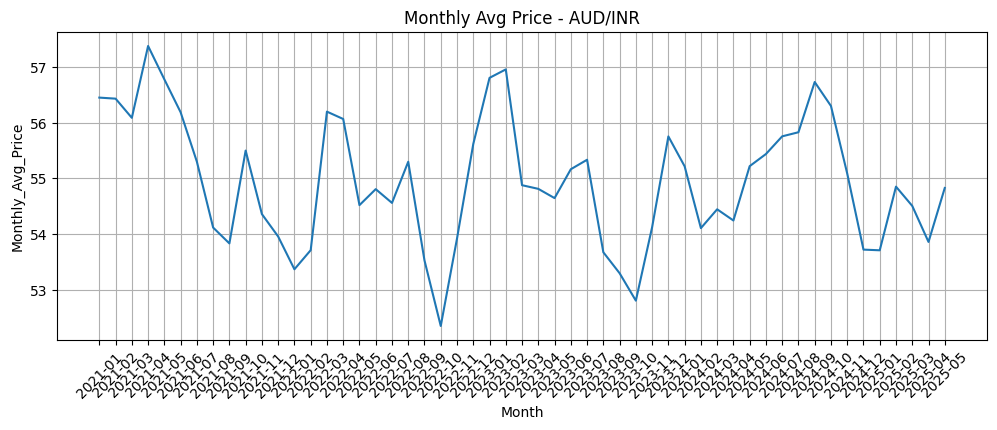

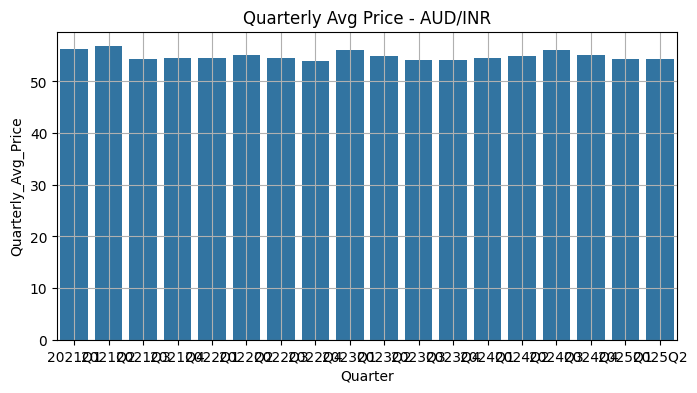

In [ ]:
monthly = pd.read_csv("AUD_Monthly_Avg.csv")
quarterly = pd.read_csv("AUD_Quarterly_Avg.csv")

# Monthly trend
plt.figure(figsize=(12,4))
sns.lineplot(x='Month', y='Monthly_Avg_Price', data=monthly)
plt.title("Monthly Avg Price - AUD/INR")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Quarterly trend
plt.figure(figsize=(8,4))
sns.barplot(x='Quarter', y='Quarterly_Avg_Price', data=quarterly)
plt.title("Quarterly Avg Price - AUD/INR")
plt.grid()
plt.show()


In [ ]:
# Best time to withdraw (i.e., high exchange rate)
best = df.loc[df['Price'].idxmax()]
worst = df.loc[df['Price'].idxmin()]
latest = df.iloc[-1]

print("🔼 Best Time to Withdraw:")
print(f"Date: {best['Date'].date()}, Price: INR {best['Price']:.2f}")

print("\n🔽 Worst Time to Withdraw:")
print(f"Date: {worst['Date'].date()}, Price: INR {worst['Price']:.2f}")

print("\n📌 Latest Rate:")
print(f"Date: {latest['Date'].date()}, Price: INR {latest['Price']:.2f}")


🔼 Best Time to Withdraw:
Date: 2021-04-21, Price: INR 58.47

🔽 Worst Time to Withdraw:
Date: 2022-10-14, Price: INR 51.02

📌 Latest Rate:
Date: 2025-05-29, Price: INR 55.06


In [ ]:
with pd.ExcelWriter("AUD_INR_Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Daily_Data", index=False)
    monthly.to_excel(writer, sheet_name="Monthly", index=False)
    quarterly.to_excel(writer, sheet_name="Quarterly", index=False)


In [ ]:
from google.colab import files
files.download('AUD_INR_Report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with pd.ExcelWriter("AED_INR_Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Daily_Data", index=False)
    monthly.to_excel(writer, sheet_name="Monthly", index=False)
    quarterly.to_excel(writer, sheet_name="Quarterly", index=False)


In [ ]:
from google.colab import files
files.download('AED_INR_Report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with pd.ExcelWriter("GBP_INR_Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Daily_Data", index=False)
    monthly.to_excel(writer, sheet_name="Monthly", index=False)
    quarterly.to_excel(writer, sheet_name="Quarterly", index=False)


In [ ]:
from google.colab import files
files.download('GBP_INR_Report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with pd.ExcelWriter("EUR_INR_Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Daily_Data", index=False)
    monthly.to_excel(writer, sheet_name="Monthly", index=False)
    quarterly.to_excel(writer, sheet_name="Quarterly", index=False)


In [ ]:
from google.colab import files
files.download('EUR_INR_Report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with pd.ExcelWriter("USD_INR_Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Daily_Data", index=False)
    monthly.to_excel(writer, sheet_name="Monthly", index=False)
    quarterly.to_excel(writer, sheet_name="Quarterly", index=False)


In [ ]:
from google.colab import files
files.download('USD_INR_Report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install streamlit plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
!streamlit run exchange_dashboard.py & npx localtunnel --port 8501


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: exchange_dashboard.py
⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://yellow-sides-lose.loca.lt
^C


In [ ]:
# Read selected data
df = pd.read_csv(currency_files[currency], parse_dates=['Date'])
df.sort_values('Date', inplace=True)

In [ ]:
# Title
st.title(f"Exchange Rate Dashboard: {currency}/INR")

2025-06-02 10:15:34.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:34.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# --- Key Metrics ---
st.subheader("📊 Key Stats")
col1, col2, col3 = st.columns(3)

col1.metric("Latest Price", f"INR {df['Price'].iloc[-1]:.2f}")
col2.metric("7D Change %", f"{df['7D_Change_%'].iloc[-1]:.2f}%")
col3.metric("Max Price", f"INR {df['Price'].max():.2f}")


2025-06-02 10:15:37.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:37.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:37.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:37.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:37.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:37.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:37.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:37.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
# --- Daily % Change ---
st.subheader("📈 Daily % Change")
fig_change = px.line(df, x='Date', y='Daily_Change_%', title=f"{currency}/INR Daily % Change")
st.plotly_chart(fig_change, use_container_width=True)


2025-06-02 10:15:40.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:40.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:40.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:40.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:40.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 10:15:40.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
!pip install streamlit
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [ ]:
%%writefile app.py
# Copy all your Streamlit dashboard code here
import pandas as pd
import plotly.express as px
import streamlit as st

# --- Load Data ---
currencies = ['AUD', 'USD', 'GBP', 'EUR', 'AED']
currency_files = {curr: f"{curr}_INR_Enhanced_Analysis.csv" for curr in currencies}

# Sidebar - Currency Selector
st.sidebar.title("Currency Selector")
currency = st.sidebar.selectbox("Choose a currency:", currencies)

# Read selected data
df = pd.read_csv(currency_files[currency], parse_dates=['Date'])
df.sort_values('Date', inplace=True)

# Title
st.title(f"Exchange Rate Dashboard: {currency}/INR")

# --- Key Metrics ---
st.subheader("📊 Key Stats")
col1, col2, col3 = st.columns(3)

col1.metric("Latest Price", f"INR {df['Price'].iloc[-1]:.2f}")
col2.metric("7D Change %", f"{df['7D_Change_%'].iloc[-1]:.2f}%")
col3.metric("Max Price", f"INR {df['Price'].max():.2f}")

# --- Price Over Time ---
st.subheader("💹 Exchange Rate Over Time")
fig_price = px.line(df, x='Date', y='Price', title=f"{currency}/INR Price Trend")
st.plotly_chart(fig_price, use_container_width=True)

# --- Daily % Change ---
st.subheader("📈 Daily % Change")
fig_change = px.line(df, x='Date', y='Daily_Change_%', title=f"{currency}/INR Daily % Change")
st.plotly_chart(fig_change, use_container_width=True)

# --- 7D Rolling Change ---
st.subheader("📉 7-Day Rolling Change %")
fig_rolling = px.line(df, x='Date', y='7D_Change_%', title=f"{currency}/INR 7D Rolling Change")
st.plotly_chart(fig_rolling, use_container_width=True)

# --- Price Range % ---
st.subheader("📊 Daily Price Range %")
fig_range = px.line(df, x='Date', y='Range_%', title=f"{currency}/INR Daily Price Range %")
st.plotly_chart(fig_range, use_container_width=True)

# --- Monthly/Quarterly (Optional Expanders) ---
with st.expander("📅 Monthly & Quarterly Averages"):
    monthly = pd.read_csv(f"{currency}_Monthly_Avg.csv")
    quarterly = pd.read_csv(f"{currency}_Quarterly_Avg.csv")

    st.write("### Monthly Average")
    fig_month = px.line(monthly, x='Month', y='Monthly_Avg_Price', title=f"{currency}/INR Monthly Average")
    st.plotly_chart(fig_month, use_container_width=True)

    st.write("### Quarterly Average")
    fig_qtr = px.bar(quarterly, x='Quarter', y='Quarterly_Avg_Price', title=f"{currency}/INR Quarterly Average")
    st.plotly_chart(fig_qtr, use_container_width=True)


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.173.20.34:8501

your url is: https://loose-turtles-start.loca.lt
  Stopping...
^C


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.173.20.34:8501

⠦⠧your url is: https://hungry-dancers-flow.loca.lt
  Stopping...
^C


In [ ]:
#05-06-2025

In [ ]:
import pandas as pd
import plotly.express as px
#import streamlit as st

In [ ]:


# --- Load Data ---
currencies = ['AUD', 'USD', 'GBP', 'EUR', 'AED']
currency_files = {curr: f"{curr}_INR_Enhanced_Analysis.csv" for curr in currencies}

# Sidebar - Currency Selector
st.sidebar.title("Currency Selector")
currency = st.sidebar.selectbox("Choose a currency:", currencies)

# Read selected data
df = pd.read_csv(currency_files[currency], parse_dates=['Date'])
df.sort_values('Date', inplace=True)

# --- Create Date Table ---
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
date_table = pd.DataFrame({'Date': date_range})
date_table['Year'] = date_table['Date'].dt.year
date_table['MonthNumber'] = date_table['Date'].dt.month
date_table['MonthName'] = date_table['Date'].dt.strftime('%B')
date_table['MonthYear'] = date_table['Date'].dt.strftime('%b %Y')
date_table['MonthYearSort'] = date_table['Year'] * 100 + date_table['MonthNumber']
date_table['Quarter'] = 'Q' + date_table['Date'].dt.quarter.astype(str)
date_table['QuarterYear'] = date_table['Quarter'] + ' ' + date_table['Year'].astype(str)
date_table['Day'] = date_table['Date'].dt.day
date_table['Weekday'] = date_table['Date'].dt.strftime('%A')
date_table['WeekdayShort'] = date_table['Date'].dt.strftime('%a')
date_table['IsWeekend'] = date_table['Date'].dt.weekday >= 5

# Title
st.title(f"Exchange Rate Dashboard: {currency}/INR")

# --- Key Metrics ---
st.subheader("📊 Key Stats")
col1, col2, col3 = st.columns(3)

col1.metric("Latest Price", f"INR {df['Price'].iloc[-1]:.2f}")
col2.metric("7D Change %", f"{df['7D_Change_%'].iloc[-1]:.2f}%")
col3.metric("Max Price", f"INR {df['Price'].max():.2f}")

# --- Price Over Time ---
st.subheader("💹 Exchange Rate Over Time")
fig_price = px.line(df, x='Date', y='Price', title=f"{currency}/INR Price Trend")
st.plotly_chart(fig_price, use_container_width=True)

# --- Daily % Change ---
st.subheader("📈 Daily % Change")
fig_change = px.line(df, x='Date', y='Daily_Change_%', title=f"{currency}/INR Daily % Change")
st.plotly_chart(fig_change, use_container_width=True)

# --- 7D Rolling Change ---
st.subheader("📉 7-Day Rolling Change %")
fig_rolling = px.line(df, x='Date', y='7D_Change_%', title=f"{currency}/INR 7D Rolling Change")
st.plotly_chart(fig_rolling, use_container_width=True)

# --- Price Range % ---
st.subheader("📊 Daily Price Range %")
fig_range = px.line(df, x='Date', y='Range_%', title=f"{currency}/INR Daily Price Range %")
st.plotly_chart(fig_range, use_container_width=True)

# --- Monthly/Quarterly (Optional Expanders) ---
with st.expander("📅 Monthly & Quarterly Averages"):
    monthly = pd.read_csv(f"{currency}_Monthly_Avg.csv")
    quarterly = pd.read_csv(f"{currency}_Quarterly_Avg.csv")

    st.write("### Monthly Average")
    fig_month = px.line(monthly, x='Month', y='Monthly_Avg_Price', title=f"{currency}/INR Monthly Average")
    st.plotly_chart(fig_month, use_container_width=True)

    st.write("### Quarterly Average")
    fig_qtr = px.bar(quarterly, x='Quarter', y='Quarterly_Avg_Price', title=f"{currency}/INR Quarterly Average")
    st.plotly_chart(fig_qtr, use_container_width=True)

# --- Optionally display date table preview for validation ---
with st.expander("🗓️ Date Table Preview"):
    st.dataframe(date_table.head(12))


NameError: name 'st' is not defined